In [1]:
# import some basic libraries
import numpy as np
%matplotlib inline

# 5. Additional Statistics Functions

`pymer4` also comes with some flexible routines for various statistical operations such as permutation testing, bootstrapping of arbitrary functions and equivalence testing. Here are a few examples:


Permutation Tests
-----------------
`pymer4` can compute a wide variety of one and two-sample permutation tests including mean differences, t-statistics, effect size comparisons, and correlations



In [3]:
# Import stats functions
from pymer4.stats import perm_test
# Also fix the random number generator for reproducibility
np.random.seed(10)

# Generate two samples of data: X (M~2, SD~10, N=100) and Y (M~2.5, SD~1, N=100)
x = np.random.normal(loc=2, size=100)
y = np.random.normal(loc=2.5, size=100)

# Between groups t-test. The first value is the t-stat and the 
# second is the permuted p-value
result = perm_test(x, y, stat="tstat", n_perm=500, n_jobs=1)
result

(-3.529814975986372, 0.001996007984031936)

In [4]:
# Spearman rank correlation. The first values is spearman's rho
# and the second is the permuted p-value
result = perm_test(x, y, stat="spearmanr", n_perm=500, n_jobs=1)
result

(0.04469246924692469, 0.6786427145708582)

Bootstrap Comparisons
----------------------
`pymer4` can compute a bootstrap comparison using any arbitrary function that takes as input either one or two 1d numpy arrays, and returns a single value.



In [5]:
# Import stats function
from pymer4.stats import boot_func


# Define a simple function for a median difference test
def med_diff(x, y):
    return np.median(x) - np.median(y)


# Between groups median test with resampling
# The first value is the median difference and the 
# second is the lower and upper 95% confidence interval
result = boot_func(x, y, func=med_diff)
result

(-0.4928648709628707, (-0.8719792375122976, -0.09680478598285287))

TOST Equivalence Tests
----------------------
`pymer4` also has experimental support for [two-one-sided equivalence tests](https://bit.ly/33wsB5i/).



original: {'m': -0.005770606287536645, 't': -0.4781080137390306, 'p': 0.6533466533466533}

lower: {'m': -0.1, 't': 7.807122166868652, 'p': 5.9293193911969926e-08}

upper: {'m': 0.1, 't': -8.763338194346712, 'p': 8.999109365849837e-09}

cohens_d: {'m': -0.17019805423837045, 'CI_lb': -0.8348542426833095, 'CI_ub': 0.5990340538537716}

In_Equivalence_Range: True

Means_Are_Different: False



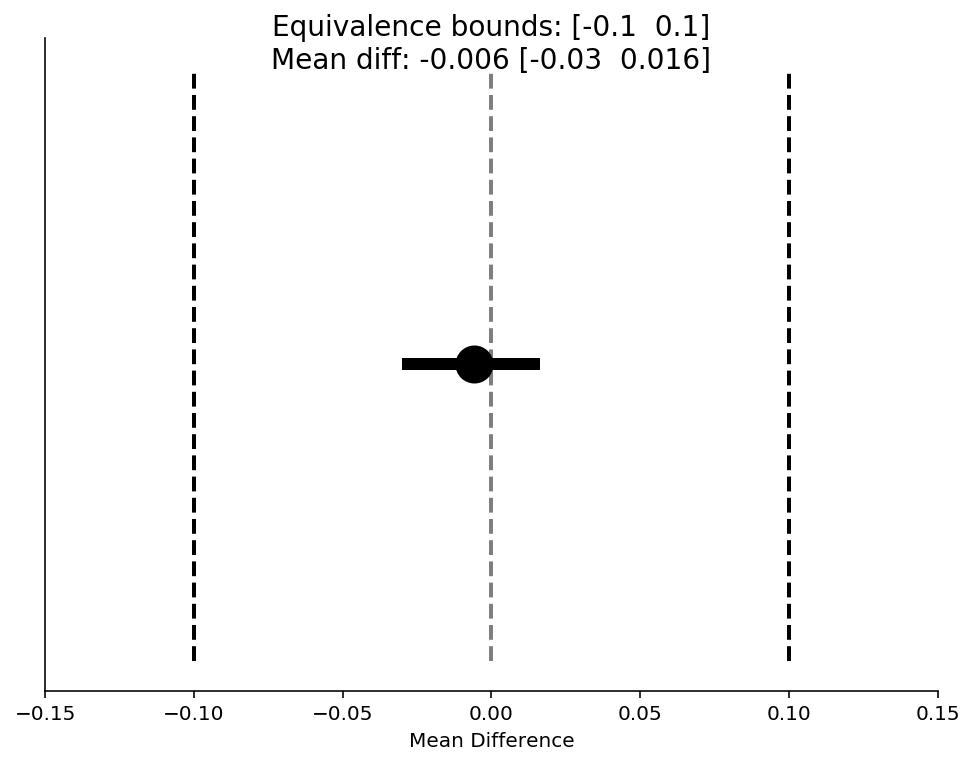

In [6]:
# Import stats function
from pymer4.stats import tost_equivalence

# Generate some data
lower, upper = -0.1, 0.1
x, y = np.random.normal(0.145, 0.025, 35), np.random.normal(0.16, 0.05, 17)
result = tost_equivalence(x, y, lower, upper, plot=True)
# Print the results dictionary nicely
for k, v in result.items():
    print(f"{k}: {v}\n")